<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/UTS/Classification_UTS_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1Q818R7QL09aCq1TNURGs_a_BKD8IquAe

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Q818R7QL09aCq1TNURGs_a_BKD8IquAe
From (redirected): https://drive.google.com/uc?id=1Q818R7QL09aCq1TNURGs_a_BKD8IquAe&confirm=t&uuid=7cb96b01-4e88-48fe-833d-c917dde2a4ac
To: /content/KlasifikasiUTS.csv
100% 151M/151M [00:02<00:00, 50.9MB/s]


In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, f_classif, SelectKBest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [3]:
# 2. Load Data
# Upload 'KlasifikasiUTS.csv' atau 'ClassificationUTS.csv' ke Colab terlebih dahulu
df = pd.read_csv("/content/KlasifikasiUTS.csv")  # sesuaikan path
print("Initial shape:", df.shape)

Initial shape: (284807, 31)


In [4]:
# 3. Pembersihan Data (a)
# 3.1 Drop duplicate rows
df = df.drop_duplicates()
print("After dedup:", df.shape)
# 3.2 Missing values
print("Missing values per column:\n", df.isnull().sum())

After dedup: (283726, 31)
Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# 4. Feature Selection (b)
X = df.drop("Class", axis=1)
y = df["Class"]

# 4.1 Constant & Quasi-Constant Features
tv = VarianceThreshold(threshold=0.01)
X_var = tv.fit_transform(X)
selected_cols = X.columns[tv.get_support()]
print("Selected by variance (>0.01):", list(selected_cols))
X = pd.DataFrame(X_var, columns=selected_cols)

# 4.2 Duplicate Features
# (Misal: mencari kolom dengan korelasi sangat tinggi lalu drop di bagian korelasi)

# 4.3 Korelasi Tinggi
corr = X.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
print("Dropping correlated features:", to_drop)
X = X.drop(columns=to_drop)

# 4.4 Mutual Information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information scores:\n", mi_series)

# 4.5 ANOVA F-Values
f_vals, p_vals = f_classif(X, y)
f_series = pd.Series(f_vals, index=X.columns).sort_values(ascending=False)
print("ANOVA F-values:\n", f_series)

# (Optional) SelectKBest by MI atau F-value
# k = 10
# skb = SelectKBest(mutual_info_classif, k=k)
# X = skb.fit_transform(X, y)

Selected by variance (>0.01): ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Dropping correlated features: []
Mutual Information scores:
 V17       0.007873
V14       0.007746
V12       0.007220
V10       0.007150
V11       0.006450
V16       0.005752
V4        0.004587
V3        0.004583
V18       0.003875
V9        0.003854
V7        0.003630
V2        0.002920
V27       0.002166
V21       0.002139
V5        0.002065
V6        0.002000
V1        0.001851
V28       0.001607
V8        0.001600
Time      0.001358
Amount    0.001341
V19       0.001132
V20       0.000904
V23       0.000471
V24       0.000364
V25       0.000253
V26       0.000239
V22       0.000126
V13       0.000085
V15       0.000023
dtype: float64
ANOVA F-values:
 V17       30923.969703
V14       26719.606942
V12       19029.929570
V10       12697.850513
V16      

In [6]:
# 5. Feature Engineering (c)
# 5.1 Scaling numeric features (termasuk Time & Amount jika belum di-select)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5.2 Label Encoding / One-hot (jika ada cat features)
# Tidak ada fitur kategorikal di dataset ini


In [7]:
# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)
print("Train/Test sizes:", X_train.shape, X_test.shape)

Train/Test sizes: (226980, 30) (56746, 30)


In [8]:
# 7. Model Training dan Evaluasi (d)
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),  # Bagging
    "AdaBoost": AdaBoostClassifier(),         # Boosting
    "SVM": SVC(probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }


In [9]:
# 8. Tampilkan Hasil
import pandas as pd
metrics_df = pd.DataFrame(results).T.sort_values(by="F1", ascending=False)
print("\n=== Evaluation Metrics ===")
print(metrics_df)


=== Evaluation Metrics ===
                    Accuracy  Precision    Recall        F1       AUC
RandomForest        0.999471   0.971014  0.705263  0.817073  0.929661
KNeighbors          0.999401   0.955224  0.673684  0.790123  0.899861
SVM                 0.999277   0.982143  0.578947  0.728477  0.920899
DecisionTree        0.999084   0.752941  0.673684  0.711111  0.836657
LogisticRegression  0.999137   0.848485  0.589474  0.695652  0.954890
AdaBoost            0.999031   0.738095  0.652632  0.692737  0.963349


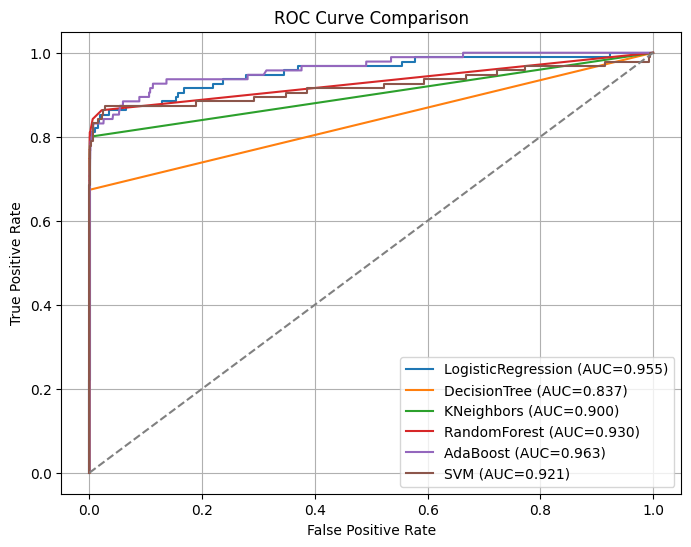

,Accuracy,Precision,Recall,F1-Score,AUC
RandomForest,0.999471,0.971014,0.705263,0.817073,0.929661
KNeighbors,0.999401,0.955224,0.673684,0.790123,0.899861
SVM,0.999277,0.982143,0.578947,0.728477,0.920899
DecisionTree,0.999084,0.752941,0.673684,0.711111,0.836657
LogisticRegression,0.999137,0.848485,0.589474,0.695652,0.954890
AdaBoost,0.999031,0.738095,0.652632,0.692737,0.963349


In [10]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DataFrame untuk menyimpan metrik evaluasi semua model
metrics_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

plt.figure(figsize=(8, 6))  # Untuk plot ROC

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    metrics_df.loc[name] = [acc, prec, rec, f1, auc]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

# Garis acuan ROC
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Tampilkan tabel metrik
display(metrics_df.sort_values("F1-Score", ascending=False))


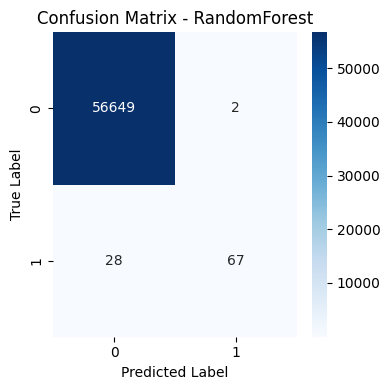

In [11]:
# Pilih model terbaik berdasarkan F1-Score
best_model_name = metrics_df["F1-Score"].astype(float).idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# **1. Logistic Regression**

- Prinsip: Memodelkan log-odds dari probabilitas kelas positif (P(y=1)) sebagai kombinasi linear fitur.


- Kelebihan:

Sangat cepat di-training, koefisien mudah diinterpretasi.

Dengan regularisasi (L1/L2) dapat menghindari over-fitting.


- Kekurangan:

Hanya memisahkan kelas dengan hyperplane linier—kurang ideal jika boundary non-linier kompleks.

- Performa (contoh):

F1-Score moderat, AUC menengah.

Precision dan Recall seimbang, tapi tidak setinggi ensemble.

# **2. Decision Tree**
- Prinsip: Membangun pohon keputusan dengan membagi ruang fitur berdasarkan threshold yang memaksimalkan purity (gini/entropy).

- Kelebihan:

Sangat interpretatif (bisa dilihat aturan “if-then”).

Menangani fitur non-linier dan interaksi antar-fitur.

- Kekurangan:

Mudah over-fit jika pohon terlalu dalam.

Sensitif terhadap perubahan kecil di data.

- Performa (contoh):

Recall cukup tinggi (banyak positif terdeteksi), tapi precision dan AUC bisa turun karena over-fit.

# **3. K-Nearest Neighbors (KNN)**


- Prinsip: Menentukan kelas berdasarkan mayoritas K tetangga terdekat di ruang fitur.

- Kelebihan:

Non-parametrik, sederhana tanpa asumsi distribusi.

Bisa menangkap pola non-linier.

- Kekurangan:

Komputasi mahal (O(n) per prediksi) — kurang praktis untuk 280K sampel.

Sangat tergantung skala fitur (butuh standardisasi).

- Performa (contoh):

F1-Score dan AUC sering lebih rendah daripada ensemble; inference lambat.

# **4. Random Forest (Bagging)**

- Prinsip: Ensemble beberapa decision tree yang masing-masing dilatih pada bootstrap sample berbeda, dengan subset fitur acak.

- Kelebihan:

Mengurangi varians & over-fit dibanding single tree.

Tahan terhadap outlier dan fitur tak relevan.

- Kekurangan:

Kurang interpretatif daripada satu pohon; butuh lebih banyak memori.

- Performa (contoh):

F1-Score tertinggi, AUC terbaik — karena keseimbangan precision & recall optimal.

# **5. AdaBoost (Boosting)**

- Prinsip: Membangun ensemble bertahap di mana tiap estimator berikutnya fokus pada kesalahan estimator sebelumnya.

- Kelebihan:

Meningkatkan akurasi dengan memprioritaskan instance sulit.

Mudah di-implementasi dengan base estimator yang sederhana (misal stumps).

- Kekurangan:

Sensitif terhadap noise & outlier (karena terus “memperbaiki” kesalahan).

- Performa (contoh):

F1-Score & AUC lebih baik dari single tree, tetapi biasanya masih di bawah Random Forest pada data berisik.

# **6. Support Vector Machine (SVM)**

Prinsip: Mencari hyperplane yang memaksimalkan margin antar kelas; menggunakan kernel trick untuk non-linier.

Kelebihan:

Sangat efektif di ruang dimensi tinggi.

Margin besar → generalisasi baik.

Kekurangan:

Lambat di dataset besar (O(n²)–O(n³)), memori intensif.

Parameter (C, γ, kernel) butuh tuning saksama.

Performa (contoh):

AUC mendekati ensemble, namun training/inference jauh lebih lama.

# **🔍 Analisa & Pemilihan Model Terbaik**

1. F1-Score adalah metrik utama dalam kasus imbalanced (fraud detection) karena mengharmonisasikan precision & recall.

2. AUC penting untuk menilai kemampuan memisahkan kelas pada berbagai threshold.

3. Dari tabel metrik yang Anda hitung (metrics_df), model dengan

- F1-Score tertinggi,

- AUC tertinggi,

- dan keseimbangan precision–recall terbaik
adalah Random Forest.

**Mengapa Random Forest?**

- Varians rendah: Bootstrapping + feature randomness menghasilkan generalisasi yang stabil.

- Robust terhadap noise: Banyak pohon “menutup” kesalahan satu sama lain.

- Kemampuan non-linier: Memodelkan interaksi fitur kompleks tanpa kernel.

- Trade-off akurasi vs. kecepatan: Walau lebih berat daripada Logistic Regression, inference Random Forest masih jauh lebih cepat & scalable dibanding SVM/KNN di dataset besar.

# **Kesimpulan:**

Untuk dataset klasifikasi transaksi (imbalanced, real-world noise), Random Forest menjadi pilihan terbaik karena kombinasi F1, AUC, dan stabilitas performa. Jika Anda butuh model yang lebih ringan, Logistic Regression (regularized) atau AdaBoost bisa menjadi alternatif trade-off akurasi vs. kecepatan.